## Distance Based on Autocorrelation

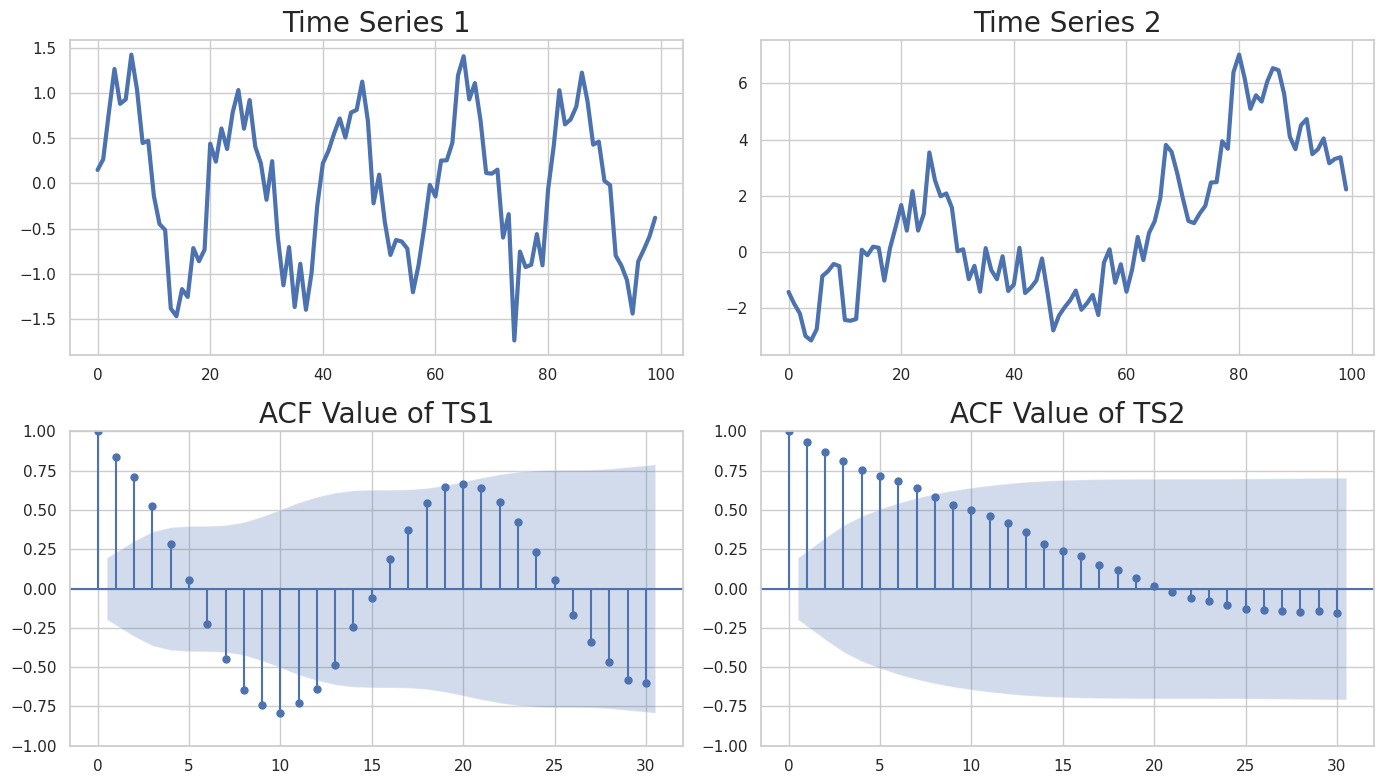

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

sns.set_theme(style="whitegrid")

np.random.seed(42)

n = 100

t = np.arange(n)
ts1 = np.sin(2 * np.pi * t / 20) + np.random.normal(0, 0.3, n)

ts2 = np.cumsum(np.random.normal(0, 1, n))

plt.figure(figsize=(14, 8))

title_fontsize = 20
legend_fontsize = 10
line_width = 3.0


plt.subplot(2, 2, 1)
plt.plot(ts1, label='Time Series 1', linewidth=line_width)
plt.title('Time Series 1', fontsize=title_fontsize)
# plt.legend(fontsize=legend_fontsize)

plt.subplot(2, 2, 2)
plt.plot(ts2, label='Time Series 2', linewidth=line_width)
plt.title('Time Series 2', fontsize=title_fontsize)
# plt.legend(fontsize=legend_fontsize)

# draw Autocorrelation（lags=30）
plt.subplot(2, 2, 3)
plot_acf(ts1, ax=plt.gca(), lags=30)
plt.title('ACF Value of TS1', fontsize=title_fontsize)

plt.subplot(2, 2, 4)
plot_acf(ts2, ax=plt.gca(), lags=30)
plt.title('ACF Value of TS2', fontsize=title_fontsize)

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import acf

# calculate ACF vector
lags = 30
acf_ts1 = acf(ts1, nlags=lags)
acf_ts2 = acf(ts2, nlags=lags)


acf_diff = acf_ts1 - acf_ts2
print(acf_diff.shape)


Omega_dict = {
    "Identity Matrix": np.eye(lags + 1),  
    "Linear Decay": np.diag(1 / (np.arange(lags + 1) + 1)),  
    "Exponential Decay": np.diag(np.exp(-0.2 * np.arange(lags + 1))), 
    "High Weight on Lag 1": np.eye(lags + 1) * 0.5,
}
Omega_dict["High Weight on Lag 1"][1, 1] = 5  

print("ACF Distance under different weight matrices:")
for name, Omega in Omega_dict.items():
    distance = np.sqrt(acf_diff @ Omega @ acf_diff.T)
    print(f"{name}: {distance:.4f}")

(31,)
ACF Distance under different weight matrices:
Identity Matrix: 3.7306
Linear Decay: 1.1380
Exponential Decay: 1.4276
High Weight on Lag 1: 2.6451


## Distance Based on Periodogram

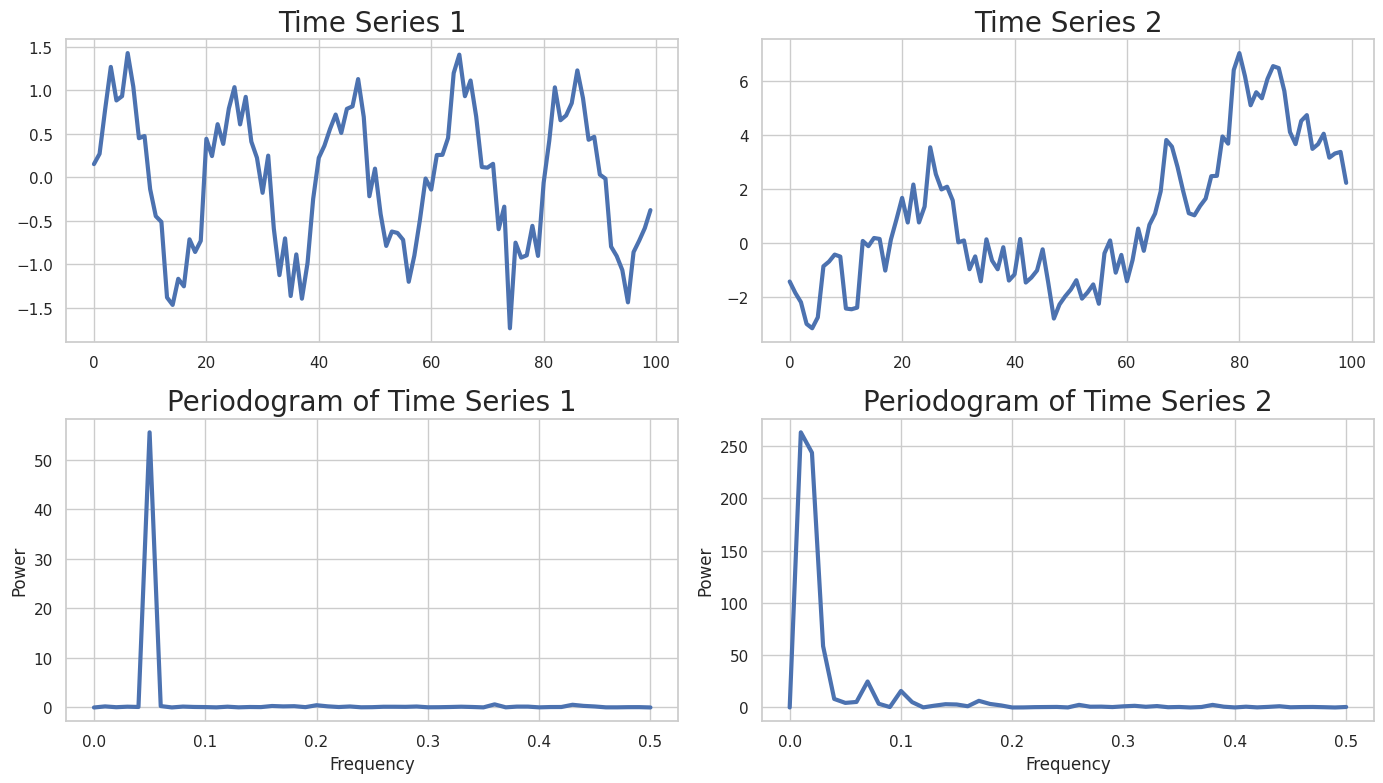

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import periodogram

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Set random seed for reproducibility
np.random.seed(42)

# Generate two time series
n = 100

# Time series 1: Periodic series (sine wave + noise)
t = np.arange(n)
ts1 = np.sin(2 * np.pi * t / 20) + np.random.normal(0, 0.3, n)

# Time series 2: Non-stationary series (random walk)
ts2 = np.cumsum(np.random.normal(0, 1, n))

# Compute periodograms (frequency and power spectrum)
freqs1, power1 = periodogram(ts1)
freqs2, power2 = periodogram(ts2)

# Visualization
plt.figure(figsize=(14, 8))


title_fontsize = 20
legend_fontsize = 10
line_width = 3.0

# Plot time series 1
plt.subplot(2, 2, 1)
plt.plot(t, ts1, linewidth=line_width, label="Time Series 1")
plt.title('Time Series 1', fontsize=title_fontsize)
# plt.legend()

# Plot time series 2
plt.subplot(2, 2, 2)
plt.plot(t, ts2, linewidth=line_width, label="Time Series 2")
plt.title('Time Series 2', fontsize=title_fontsize)
# plt.legend()

# Plot periodogram of time series 1
plt.subplot(2, 2, 3)
plt.plot(freqs1, power1, linewidth=line_width, label="Periodogram of TS1")
plt.title('Periodogram of Time Series 1', fontsize=title_fontsize)
plt.xlabel('Frequency')
plt.ylabel('Power')
# plt.legend()

# Plot periodogram of time series 2
plt.subplot(2, 2, 4)
plt.plot(freqs2, power2, linewidth=line_width, label="Periodogram of TS2")
plt.title('Periodogram of Time Series 2', fontsize=title_fontsize)
plt.xlabel('Frequency')
plt.ylabel('Power')
# plt.legend()

plt.tight_layout()
plt.show()


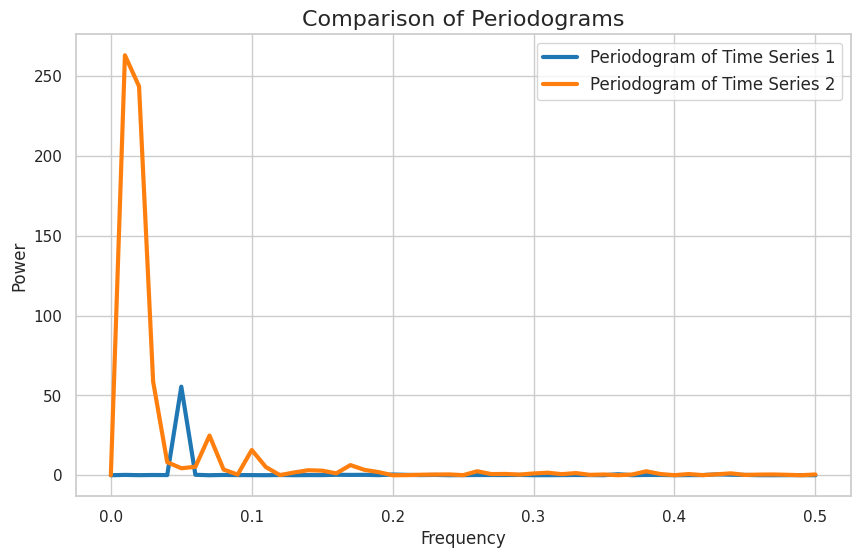

Raw Periodogram-Based Distance: 14.0383
Normalized Periodogram-Based Distance: 3.6776
Log-Transformed Periodogram-Based Distance: 1.7866


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

freqs1, power1 = periodogram(ts1)
freqs2, power2 = periodogram(ts2)

plt.figure(figsize=(10, 6))
plt.plot(freqs1, power1, label='Periodogram of Time Series 1', linewidth=3, color='tab:blue')
plt.plot(freqs2, power2, label='Periodogram of Time Series 2', linewidth=3, color='tab:orange')
plt.title('Comparison of Periodograms', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# --- 1. Raw Periodogram-Based Distance ---
raw_distance = np.mean(np.abs(power1 - power2))

# --- 2. Normalized Periodogram-Based Distance ---
# Normalize by variance (gamma0, which is the variance of the time series)
gamma0_ts1 = np.var(ts1)
gamma0_ts2 = np.var(ts2)

normalized_power1 = power1 / gamma0_ts1
normalized_power2 = power2 / gamma0_ts2

normalized_distance = np.mean(np.abs(normalized_power1 - normalized_power2))

# --- 3. Log-Transformed Periodogram-Based Distance ---
# Log transform (adding small epsilon to avoid log(0))
log_power1 = np.log(normalized_power1 + 1e-8)
log_power2 = np.log(normalized_power2 + 1e-8)

log_transformed_distance = np.mean(np.abs(log_power1 - log_power2))

# Print distances
print(f"Raw Periodogram-Based Distance: {raw_distance:.4f}")
print(f"Normalized Periodogram-Based Distance: {normalized_distance:.4f}")
print(f"Log-Transformed Periodogram-Based Distance: {log_transformed_distance:.4f}")
